### QED-C Application-Oriented Benchmarks - Hamiltonian Simulation with HamLib - Observables

The notebook contains specific examples for the HamLib-based Hamiltonian Simulation benchmark program.
Configure and run the cell below with the desired execution settings.
Then configure and run the remaining cell(s), each one a variation of this benchmark.

This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Note: This set of benchmarks exercises new observable-oriented assessments currently under development.
This is a WORK-IN-PROGRESS.


In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
min_qubits=4
max_qubits=24
skip_qubits=1
max_circuits=1
num_shots=10000

K = 5             # number of Trotter steps
t = 1.0           # total evolution time

# ignored by cudaq for now
group_method = "simple"   # method to generate commuting groups
                            # None, "simple", "1", "2", "N"
"""
#backend_id="qasm_simulator"
backend_id="statevector_simulator"
"""
hub=""; group=""; project=""
provider_backend = None

exec_options = {}

backend_id="nvidia"
api = "cudaq"


In [3]:
# Configure benchmark library modules
import sys
sys.path.insert(1, "../_common")
sys.path.insert(1, "../_common/cudaq")

import execute
execute.verbose = False
execute.verbose_time = False
#execute.noise = None

# Configure paths for hamlib benchmark modules
sys.path.insert(1, "_common")
sys.path.insert(1, "cudaq")

# ... access to HamLib datasets
import hamlib_utils
hamlib_utils.verbose = False

# ... for api-specific kernel functions (circuits)
import hamlib_simulation_kernel
hamlib_simulation_kernel.verbose = False

# ... for high-level HamLib simulation benchmark loop
import hamlib_simulation_benchmark
hamlib_simulation_benchmark.verbose = False


### Hamiltonian Simulation - Transverse Field Ising Model


Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/tfim/tfim.zip
       using cached data if possible
... execution starting at Jan 30, 2025 17:19:06 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... total execution time = 0.153
... exact computation time = 0.006 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: 4.2594
    ==> Simulation Quality: -1.065

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... total execution time = 0.003
... exact computation time = 0.008 sec

    Exact expectation value, computed classically: -3.0
    Estimated expectation value, from quantum algorithm: 3.5098
    ==> Simulation Quali

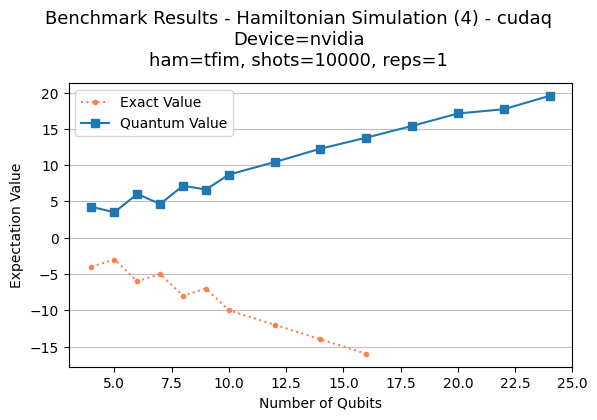

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - cudaq
Device=nvidia
ham=tfim, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24]
[0.006, 0.008, 0.011, 0.022, 0.025, 0.024, 0.032, 0.057, 0.142, 0.549]
[0.153, 0.003, 0.002, 0.003, 0.004, 0.004, 0.004, 0.004, 0.005, 0.007, 0.007, 0.008, 0.013, 0.126]


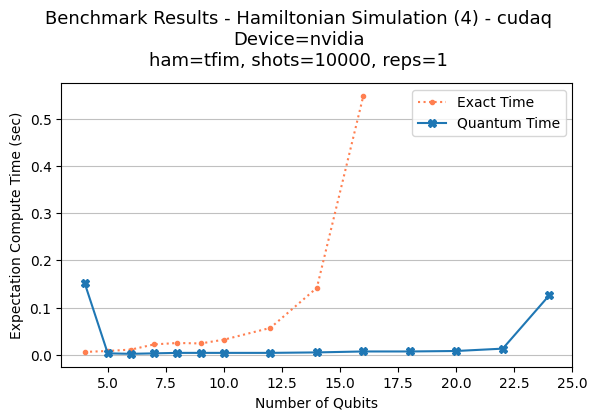

In [4]:
# Transverse Field Ising Model - 1D grid pbc h=2
hamiltonian_name = 'condensedmatter/tfim/tfim'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=4, hamiltonian = hamiltonian_name, K = K, t = t,
                hamiltonian_params = hamiltonian_params,  
                do_observables = True, group_method = group_method,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options,
                api=api)

### Hamiltonian Simulation - Heisenberg Model


Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/heisenberg/heis.zip
       using cached data if possible
... execution starting at Jan 30, 2025 17:19:23 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-4_h-2
... total execution time = 0.005
... exact computation time = 0.009 sec

    Exact expectation value, computed classically: -4.0
    Estimated expectation value, from quantum algorithm: 4.2767
    ==> Simulation Quality: -1.069

************
Executing [1] circuits with num_qubits = 5
... dataset_name = graph-1D-grid-pbc-qubitnodes_Lx-5_h-2
... total execution time = 0.005
... exact computation time = 0.014 sec

    Exact expectation value, computed classically: -1.0
    Estimated expectation value, from quantum algorithm: 6.4031
    ==> Simulation

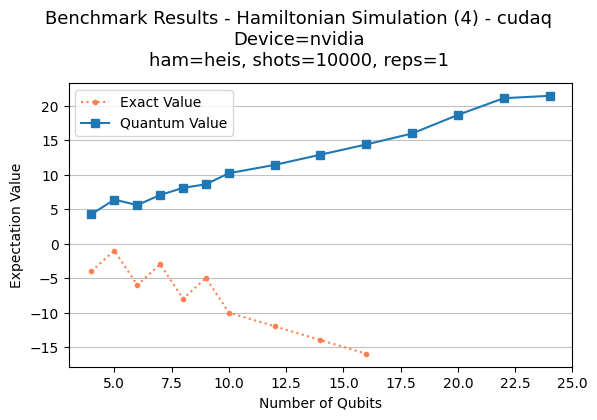

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - cudaq
Device=nvidia
ham=heis, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24]
[0.009, 0.014, 0.02, 0.026, 0.038, 0.047, 0.06, 0.096, 0.232, 0.595]
[0.005, 0.005, 0.006, 0.007, 0.007, 0.011, 0.022, 0.01, 0.012, 0.024, 0.034, 0.051, 0.125, 0.49]


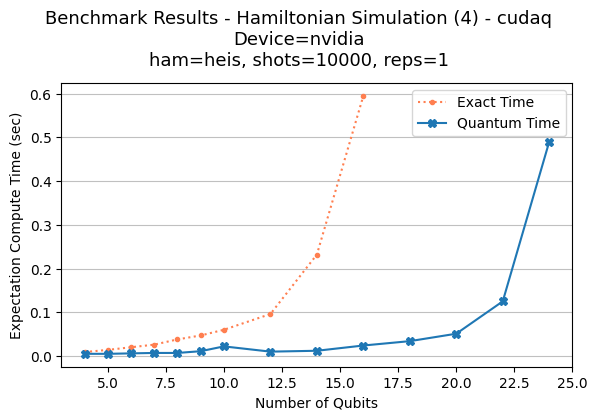

In [5]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/heisenberg/heis'
hamiltonian_params = { "1D-grid": "pbc", "h": 2 }

hamlib_simulation_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
    max_circuits=max_circuits, num_shots=num_shots,
    method=4, hamiltonian = hamiltonian_name, K = K, t = t,
    hamiltonian_params = hamiltonian_params,
    do_observables = True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    api=api
)

### Hamiltonian Simulation - Fermi-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/fermihubbard/FH_D-1.zip
       using cached data if possible
... execution starting at Jan 30, 2025 17:19:27 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-2_U-12_enc-bk
... total execution time = 0.003
... exact computation time = 0.007 sec

    Exact expectation value, computed classically: 0.0
    Estimated expectation value, from quantum algorithm: 7.0
    ==> Simulation Quality: 4740967115615027.0

************
Executing [1] circuits with num_qubits = 6
... dataset_name = fh-graph-1D-grid-pbc-qubitnodes_Lx-3_U-12_enc-bk
... total execution time = 0.004
... exact computation time = 0.018 sec

    Exact expectation value, computed classically: 0.0
    Estimated expectation value, from quantum alg

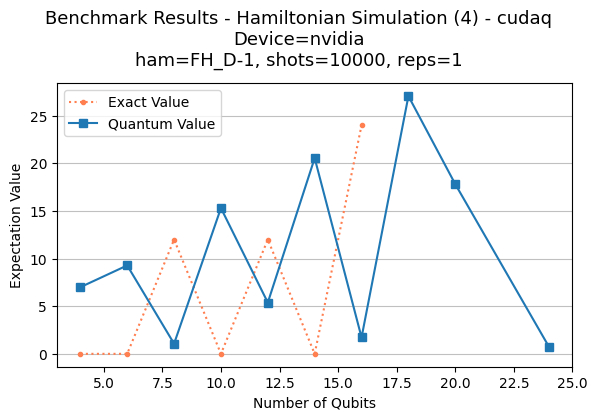

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - cudaq
Device=nvidia
ham=FH_D-1, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 6, 8, 10, 12, 14, 16, 18, 20, 24]
[0.007, 0.018, 0.035, 0.053, 0.092, 0.187, 0.965]
[0.003, 0.004, 0.006, 0.007, 0.009, 0.012, 0.01, 0.019, 0.028, 0.465]


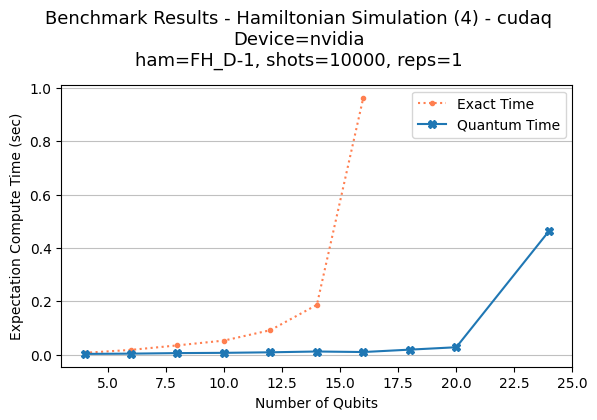

In [6]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/fermihubbard/FH_D-1'
hamiltonian_params = { "1D-grid": "pbc", "enc": "bk", "U":12 }

hamlib_simulation_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
    max_circuits=max_circuits, num_shots=num_shots,
    method=4, hamiltonian = hamiltonian_name, K = K, t = t,
    hamiltonian_params = hamiltonian_params,
    do_observables = True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    api=api
)

### Hamiltonian Simulation - Bose-Hubbard Model


Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/condensedmatter/bosehubbard/BH_D-1_d-4.zip
       using cached data if possible
... execution starting at Jan 30, 2025 17:19:44 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-10_enc-gray_d-4
... total execution time = 0.015
... exact computation time = 0.025 sec

    Exact expectation value, computed classically: 60.0
    Estimated expectation value, from quantum algorithm: -38.9976
    ==> Simulation Quality: -0.65

************
Executing [1] circuits with num_qubits = 6
... dataset_name = bh_graph-1D-grid-nonpbc-qubitnodes_Lx-3_U-10_enc-gray_d-4
... total execution time = 0.028
... exact computation time = 0.055 sec

    Exact expectation value, computed classically: 90.0
    Estimated expectation value, f

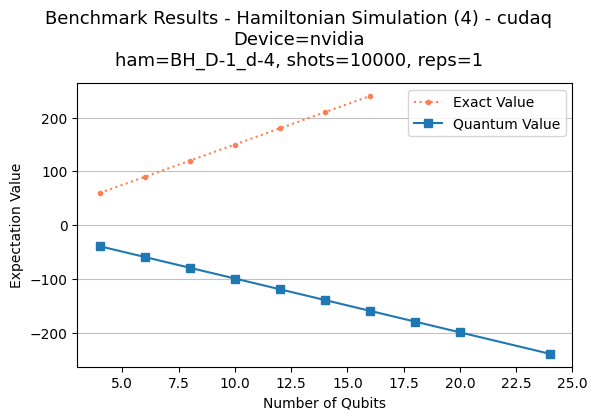

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - cudaq
Device=nvidia
ham=BH_D-1_d-4, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 6, 8, 10, 12, 14, 16, 18, 20, 24]
[0.025, 0.055, 0.118, 0.2, 0.336, 0.641, 1.699]
[0.015, 0.028, 0.04, 0.028, 0.055, 0.079, 0.067, 0.114, 0.195, 1.286]


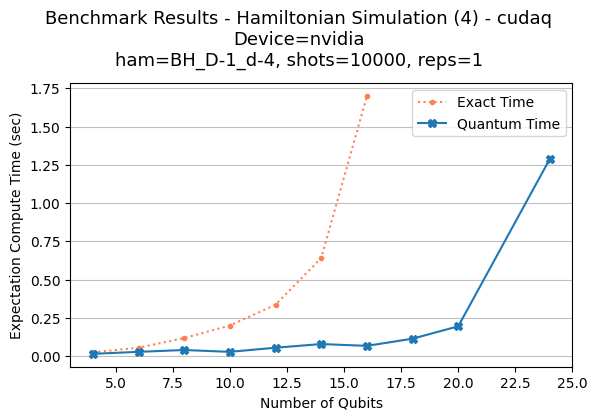

In [7]:
# Bose Hubbard 1D grid nonpbc d=4
hamiltonian_name = 'condensedmatter/bosehubbard/BH_D-1_d-4'
hamiltonian_params = { "1D-grid": "nonpbc", "enc": "gray", "U":10 }

hamlib_simulation_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
    max_circuits=max_circuits, num_shots=num_shots,
    method=4, hamiltonian = hamiltonian_name, K = K, t = 0.1,
    hamiltonian_params = hamiltonian_params,
    do_observables = True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options,
    api=api
)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/binaryoptimization/max3sat/random/random_max3sat-hams.zip
       using cached data if possible
... execution starting at Jan 30, 2025 17:19:51 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = max3sat_n-4_ratio-2_rinst-02
... total execution time = 0.005
... exact computation time = 0.007 sec

    Exact expectation value, computed classically: 7.0
    Estimated expectation value, from quantum algorithm: 1.0
    ==> Simulation Quality: 0.143

************
Executing [1] circuits with num_qubits = 5
... dataset_name = max3sat_n-5_ratio-2_rinst-02
... total execution time = 0.005
... exact computation time = 0.012 sec

    Exact expectation value, computed classically: 8.0
    Estimated expectation value, from quantum algorithm: 1.75
    ==> Simulation Qua

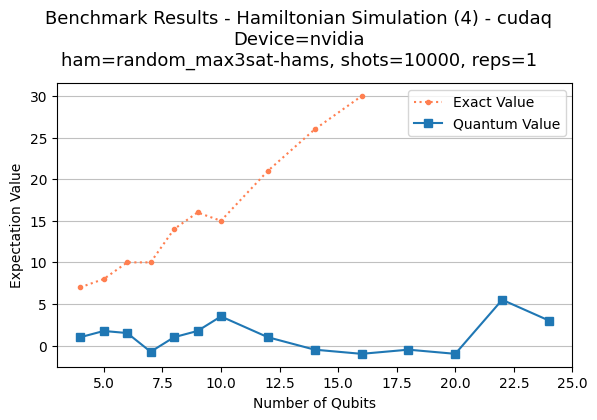

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - cudaq
Device=nvidia
ham=random_max3sat-hams, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 22, 24]
[0.007, 0.012, 0.02, 0.032, 0.041, 0.06, 0.077, 0.128, 0.23, 0.554]
[0.005, 0.005, 0.008, 0.009, 0.008, 0.007, 0.011, 0.011, 0.015, 0.024, 0.038, 0.072, 0.176, 0.464]


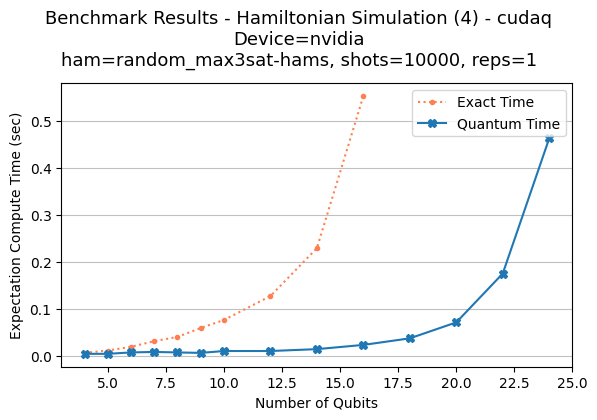

In [8]:
# Max3Sat - ratio 2 rinst 02
hamiltonian_name = 'binaryoptimization/max3sat/random/random_max3sat-hams'
hamiltonian_params = { "ratio": "2", "rinst": "02" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=4, hamiltonian = hamiltonian_name, K = K, t = t,
                hamiltonian_params = hamiltonian_params,
                do_observables = True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options,
                api=api)

### Hamiltonian Simulation - Observables
This benchmark executes a Hamiltonian simulation using the Hamiltonian terms extracted from the specified HamLib dataset.
It computes observable values for the selected Hamiltonian.

Hamiltonian Simulation Benchmark Program - Qiskit
ERROR: can not download the requested HamLib file from: https://portal.nersc.gov/cfs/m888/dcamps/hamlib/chemistry/electronic/standard/H2.zip
       using cached data if possible
... execution starting at Jan 30, 2025 17:19:54 UTC
... configure execution for target backend_id = nvidia
************
Executing [1] circuits with num_qubits = 4
... dataset_name = ham_BK-4
... total execution time = 0.003
... exact computation time = 0.011 sec

    Exact expectation value, computed classically: -0.5367
    Estimated expectation value, from quantum algorithm: 1.0889
    ==> Simulation Quality: -2.029

************
Executing [1] circuits with num_qubits = 6
... dataset_name = ham_BK-6
... total execution time = 0.009
... exact computation time = 0.046 sec

    Exact expectation value, computed classically: -0.5102
    Estimated expectation value, from quantum algorithm: 1.5223
    ==> Simulation Quality: -2.984

************
Executing [1] circui

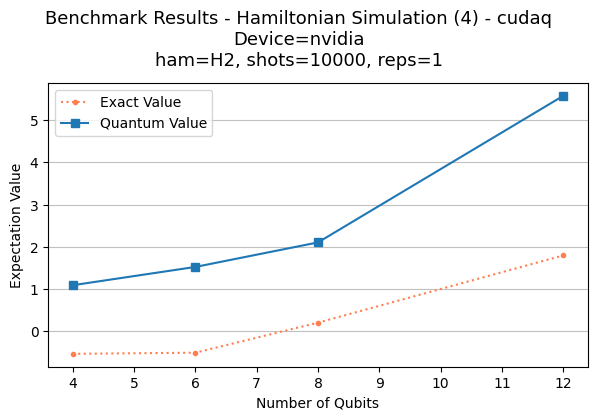

... suptitle = Benchmark Results - Hamiltonian Simulation (4) - cudaq
Device=nvidia
ham=H2, shots=10000, reps=1
----- Expectation Time Plot -----
[4, 6, 8, 12]
[0.011, 0.046, 0.195, 0.632]
[0.003, 0.009, 0.027, 0.047]


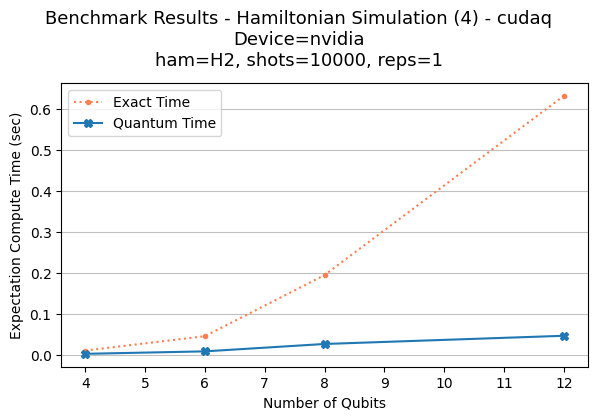

In [9]:
# H2 - BK encoding
hamiltonian_name = 'chemistry/electronic/standard/H2'
hamiltonian_params = { "ham_BK": "" }

hamlib_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=min(max_qubits, 12), skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=4, hamiltonian = hamiltonian_name, K = K, t = t,
                hamiltonian_params = hamiltonian_params,
                do_observables = True,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options,
                api=api)

### Combined Benchmark Results

In [11]:
import cudaq
print(cudaq.__version__)

CUDA-Q Version 0.8.0 (https://github.com/NVIDIA/cuda-quantum 5f63a898a1c4af1affd293fcc86220b683436f57)
